In [1]:
import torch as t
from torch import nn

In [2]:
#神经网络

class Linear(nn.Module):
    
    def __init__(self, in_feartures, out_features):
        
        super(Linear, self).__init__()
        #初始化参数
        self.w = nn.Parameter(t.randn(in_feartures, out_features))
        self.b = nn.Parameter(t.randn(out_features))
        
    def forward(self, x):
        x =x.mm(self.w)
        
        return x + self.b.expand_as(x)

In [3]:
layer = Linear(3, 4)
input = t.randn(2, 3)
output = layer(input)
print(output)
output.requires_grad

tensor([[-2.3151, -1.9070,  0.5242,  2.2089],
        [-0.0611,  1.4402,  0.8683, -2.2308]], grad_fn=<AddBackward0>)


True

In [4]:
#查看参数
for name, param in layer.named_parameters():
    print("name", name)
    print("param", param)

name w
param Parameter containing:
tensor([[ 0.2903,  0.7363,  0.1932, -0.7751],
        [-1.1618,  0.5290,  0.9465,  1.9831],
        [ 0.1967, -2.1112, -1.1696, -0.1395]], requires_grad=True)
name b
param Parameter containing:
tensor([-0.7894, -1.3832, -0.1120, -0.5937], requires_grad=True)


In [5]:
#多层感知机
class Percrptron(nn.Module):
    
    def __init__(self, in_features, hidden_features, out_feartures):
        super(Percrptron, self).__init__()
        self.layer1 = Linear(in_features, hidden_features)
        self.layer2 = Linear(hidden_features, out_feartures)
    
    def forward(self, x):
        x = self.layer1(x)
        x = t.sigmoid(x)
        
        return self.layer2(x)

In [6]:
perce = Percrptron(3 , 4, 1)
for name, par in perce.named_parameters():
    print(name, par)

    perce.parameters()

layer1.w Parameter containing:
tensor([[ 1.1114, -0.1985,  0.8754,  1.6724],
        [ 1.4368,  0.1274,  0.7323,  0.1132],
        [-0.4286, -1.2460,  0.4435, -0.4563]], requires_grad=True)
layer1.b Parameter containing:
tensor([1.3485, 0.0769, 0.6687, 0.5369], requires_grad=True)
layer2.w Parameter containing:
tensor([[ 0.6630],
        [-0.9789],
        [-0.2740],
        [ 0.5721]], requires_grad=True)
layer2.b Parameter containing:
tensor([-1.3263], requires_grad=True)


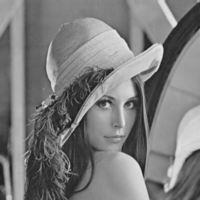

In [7]:
from PIL import Image
from torchvision.transforms import ToTensor,ToPILImage

to_tensor = ToTensor()
to_image = ToPILImage()

#加载图片

lena = Image.open("imgs/lena.png")
lena

tensor([[-0.0667, -0.0667, -0.0667],
        [-0.0667,  2.0000, -0.0667],
        [-0.0667, -0.0667, -0.0667]])
torch.Size([1, 1, 198, 198])


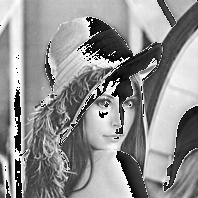

In [8]:
#简单处理数据
input = to_tensor(lena).unsqueeze(0)
input.shape

kernal = t.ones(3, 3) / -15.
kernal[1][1] = 2
print(kernal)
#卷积层
conv = nn.Conv2d(1, 1, (3, 3), 1, bias=False)
conv.weight.data = kernal.view(1, 1, 3, 3)
out = conv(input)
print(out.shape)
to_image(out.data.squeeze(0))
#nn.Conv2d??


In [9]:
#池化层
pool = nn.AvgPool2d(2, 2)
list(pool.parameters())

[]

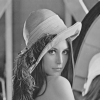

In [10]:
out = pool(input)
to_image(out.data.squeeze(0))

In [11]:
input = t.randn(2, 3)

linear = nn.Linear(3, 4)
h = linear(input)

print("输出的结果：", h)

输出的结果： tensor([[ 0.3937, -0.0271,  1.0902,  0.5398],
        [ 1.0532, -0.8474,  1.3263,  0.8411]], grad_fn=<AddmmBackward>)


In [12]:
#BN
bn = nn.BatchNorm1d(4)
bn.weight.data = t.ones(4)*4
bn.bias.data = t.zeros(4)
bn_out = bn(h)
bn_out.mean(0), bn_out.var(0, unbiased=False)

(tensor([-1.1921e-07,  0.0000e+00, -2.0266e-06,  0.0000e+00],
        grad_fn=<MeanBackward2>),
 tensor([15.9985, 15.9991, 15.9885, 15.9930], grad_fn=<VarBackward1>))

In [13]:
dropout = nn.Dropout(0.5)
o = dropout(bn_out)
o

tensor([[-0.0000,  7.9998, -7.9971, -0.0000],
        [ 7.9996, -0.0000,  7.9971,  7.9982]], grad_fn=<MulBackward0>)

In [14]:
net = nn.Sequential(
        nn.Conv2d(3, 3, 3),
        nn.BatchNorm2d(3),
        nn.ReLU())


In [15]:
net[0]

Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1))

In [16]:
#MOdelist
modelist = nn.ModuleList([nn.Linear(3, 4), nn.ReLU(), nn.Linear(4, 2)])
for model in modelist:
    print(model)

Linear(in_features=3, out_features=4, bias=True)
ReLU()
Linear(in_features=4, out_features=2, bias=True)


In [17]:
class MyModule(nn.Module):
    def __init__(self):
        super(MyModule, self).__init__()
        self.list = nn.ModuleList([nn.Conv2d(3, 3, 3), nn.ReLU()])
        
    def forward(self):
        pass
    
model = MyModule()
model


MyModule(
  (list): ModuleList(
    (0): Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
  )
)

In [18]:
for name, param in model.named_parameters():
    print(name, param.size())

list.0.weight torch.Size([3, 3, 3, 3])
list.0.bias torch.Size([3])


In [19]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.features = nn.Sequential(
                    nn.Conv2d(3, 6, 5),
                    nn.ReLU(),
                    nn.MaxPool2d(2, 2),
                    nn.Conv2d(6, 16, 5),
                    nn.ReLU(),
                    nn.MaxPool2d(2, 2)
                    )
        self.classifier = nn.Sequential(
                    nn.Linear(16*5*5, 120),
                    nn.ReLU(),
                    nn.Linear(120, 84),
                    nn.ReLU(),
                    nn.Linear(84, 10)
        )
        
    def forward(self, x):
        x = self.features(x)
        x = x.view(-1, 16*5*5)
        x = self.classifier(x)

        return x

        
net = Net()

In [20]:
net

Net(
  (features): Sequential(
    (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Linear(in_features=400, out_features=120, bias=True)
    (1): ReLU()
    (2): Linear(in_features=120, out_features=84, bias=True)
    (3): ReLU()
    (4): Linear(in_features=84, out_features=10, bias=True)
  )
)

In [21]:
from torch import  optim
optimizer = optim.SGD(params=net.parameters(), lr=1)
optimizer.zero_grad() # 梯度清零，等价于net.zero_grad()

input = t.randn(1, 3, 32, 32)
output = net(input)
output.backward(output) # fake backward

optimizer.step() # 执行优化
for name, params in net.named_parameters():
    print(name, params.shape)

features.0.weight torch.Size([6, 3, 5, 5])
features.0.bias torch.Size([6])
features.3.weight torch.Size([16, 6, 5, 5])
features.3.bias torch.Size([16])
classifier.0.weight torch.Size([120, 400])
classifier.0.bias torch.Size([120])
classifier.2.weight torch.Size([84, 120])
classifier.2.bias torch.Size([84])
classifier.4.weight torch.Size([10, 84])
classifier.4.bias torch.Size([10])


In [22]:
#设置学习率参数
optimizer = optim.SGD(
    [{"params": net.features.parameters(), 'lr': 1e-2},
    {"params":net.classifier.parameters()}
    ], lr = 1e-5)

In [23]:
optimizer

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.01
    momentum: 0
    nesterov: False
    weight_decay: 0

Parameter Group 1
    dampening: 0
    lr: 1e-05
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [24]:
#只为特定层进行设置学习率
special_layer = nn.ModuleList([net.classifier[0], net.classifier[3]])
special_layer_params = list(map(id, special_layer.parameters()))

base_params = filter(lambda p : id(p) not in special_layer_params, net.parameters())


optimizer = t.optim.SGD([
        {"params":base_params},
        {"params":special_layer.parameters(), "lr":1e-5
}], lr=0.001)
optimizer.state

defaultdict(dict, {})

In [25]:
for param_group in optimizer.param_groups:
    param_group["lr"] *= 0.1

In [26]:
optimizer

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.0001
    momentum: 0
    nesterov: False
    weight_decay: 0

Parameter Group 1
    dampening: 0
    lr: 1.0000000000000002e-06
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [27]:
from torch.nn import functional as F

In [28]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    
    def forward(self, x):
        x = F.pool(F.relu(self.conv1(x)))
        x = F.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc(x))
        x = self.fc3(x)

In [29]:
net = Net()
net

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [30]:
#自定义线性层
class MyLiner(nn.Module):
    def __init__(self):
        super(MyLiner, self).__init__()
        self.weight = nn.Parameter(t.randn(3, 4))
        self.bias = nn.Parameter(t.zeros(3))
    def forward(self):
        return F.linear(input, weight, bias)
linear = MyLiner()
linear._parameters

OrderedDict([('weight', Parameter containing:
              tensor([[-0.3897, -0.0402, -0.5198,  2.4385],
                      [-1.0008, -0.0486, -0.6183,  0.5574],
                      [ 0.8784, -0.9565, -1.5249, -0.4619]], requires_grad=True)),
             ('bias', Parameter containing:
              tensor([0., 0., 0.], requires_grad=True))])

In [31]:
from torch.nn import init

linear = nn.Linear(3, 4)
t.manual_seed(1)

#初始化参数
init.xavier_normal_(linear.weight)

Parameter containing:
tensor([[ 0.3535,  0.1427,  0.0330],
        [ 0.3321, -0.2416, -0.0888],
        [-0.8140,  0.2040, -0.5493],
        [-0.3010, -0.4769, -0.0311]], requires_grad=True)

In [32]:
import math

t.manual_seed(1)
std = math.sqrt(2)/math.sqrt(7)
linear.weight.data.normal_(0, std)

tensor([[ 0.3535,  0.1427,  0.0330],
        [ 0.3321, -0.2416, -0.0888],
        [-0.8140,  0.2040, -0.5493],
        [-0.3010, -0.4769, -0.0311]])

In [33]:
# 对模型的所有参数进行初始化
net = Net()
for name, params in net.named_parameters():
    if name.find('linear') != -1:
        print(name.find["linear"])
        # init linear
        params[0] # weight
        params[1] # bias
    elif name.find('conv') != -1:
        pass
    elif name.find('norm') != -1:
        pass

In [34]:
net._tracing_name

<bound method Module._tracing_name of Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)>

In [35]:
bn = nn.BatchNorm1d(2)
input = t.rand(3, 2)
output = bn(input)
bn._buffers

OrderedDict([('running_mean', tensor([0.0546, 0.0728])),
             ('running_var', tensor([0.9185, 0.9065])),
             ('num_batches_tracked', tensor(1))])

In [36]:
# input = t.arange(0, 12).view(3, 4)
# model = nn.Dropout()
# # 在训练阶段，会有一半左右的数被随机置为0
# model(input)